## Применение Алгоритмов Регрессии (не Бустинг)

###  Задание

Выберете набор данных для регрессии (Регрессия это когда целевая переменная имеет формально бесконечное число возможных значений).  
- возможно использование набора данных Cars Moldova, но он некоторым возможно надоел. При использовании этого набора ОБЯЗАТЕЛЬНО использовать в модели категориальные признаки и/или новые признаки  
- возможно использование данных связанных с вашими проектными работами и / или вашей работой (если разумеется этими данными можно делиться)  
- возможно использование набора данных Water Polution, но тогда надо ОБЯЗАТЕЛЬНО генерировать новые признаки  
- возможно использование наборов данных из открытых источников (OpenML, Kaggle). Основной критерий - достаточно много признаков и много данных. Условно от 5 различных признаков (без целевой переменной) и от 1000 строк данных. Примеры допустимых наборов данных (минус за креативность, что поделаешь):  
        Цена на дом https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques  

- НЕЛЬЗЯ использовать данные из соревнования в текущем семестре (спойлер - это связано с Open University Learning Analytics Dataset)  


Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений. Выполните исследовательский анализ данных. Оцените связь Признаков с целевой переменной (корреляция с помощью метода cor библиотеки Pandas)  
Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных. Адекватную в смысле учета начального распределения данных (для этого надо визуализировать данные, хотя бы).  
Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель (лучше взять не менее 3 метрик). Учитывайте дисперсию целевой переменной.   
Выберите модель машинного обучения. Это должна быть **не** линейная модель (была в прошлом семестре) и **не** ансамблевая модель (на это будет отдельное задание). Определите перечень гиперпараметров модели, которые необходимо оптимизировать.  
- можно уже играться с к-Ближайшими соседями, можно подождать обзора моделей SVM / Деревьев Решений  

Выполните оптимизацию гиперпараметров модели. Можно воспользоваться методом "вручную попробую несколько гиперпараметров", но лучше попрактиковаться с методами GridSearch, RandomizedSearch или библиотека Optuna  
Оцените полученную модель на тестовой выборке. Выполните анализ ошибок модели, а также "всего чего сможете оценить" у полученной модели. Попробуйте сделать выводы о том, почему модель принимает такие решения, какие она принимает.  
Загрузите ссылку (предварительно убедившись в открытом доступе) или ipynb файл (ура можно смотреть их прямо в MS Teams) своего решения в MS Teams  
Если копируете работу у кого-то то хотя бы поменяйте цветовые карты на графиках и перефразируйте выводы / комментарии. (или используйте другой random_state при разбиении данных)  
Если берете какие-то готовые решения из Kaggle то не поленитесь хотя бы перевести безпалевно)  

Блокнот необходимо прилежно оформить  
- хочется видеть структуру (Заголовки разного уровня);  
- ожидается видеть не только код, но и комментарии к нему;  
- не должно быть запущенных ячеек с ошибками; 
- ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке)

**Датасет:** New York City Taxi Trip Duration  
https://www.kaggle.com/competitions/nyc-taxi-trip-duration

### Dataset Description

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.  

*File descriptions*  
train.csv - the training set (contains 1458644 trip records)  
test.csv - the testing set (contains 625134 trip records)  
sample_submission.csv - a sample submission file in the correct format  
*Data fields*
id - a unique identifier for each trip  
vendor_id - a code indicating the provider associated with the trip record  
pickup_datetime - date and time when the meter was engaged  
dropoff_datetime - date and time when the meter was disengaged  
passenger_count - the number of passengers in the vehicle (driver entered value)  
pickup_longitude - the longitude where the meter was engaged  
pickup_latitude - the latitude where the meter was engaged  
dropoff_longitude - the longitude where the meter was disengaged  
dropoff_latitude - the latitude where the meter was disengaged  
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip  
trip_duration - duration of the trip in seconds  

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.  

### Импорт необходимых библиотек 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

### Загрузка датасета

In [3]:
DATASET_PATH = './'

In [4]:
train_df = pd.read_csv(f'{DATASET_PATH}train.csv', sep=',')
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
#test_df = pd.read_csv(f'{DATASET_PATH}test.csv', sep=',')
#test_df.head()

In [6]:
#submission = pd.read_csv(f'{DATASET_PATH}sample_submission.csv', sep=',')
#submission.head()

### Подготовка и обработка данных

Общие статистики по датасету

In [7]:
round(train_df.describe()) # округлим для наглядности

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


In [8]:
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Изучим временные рамки датасета

In [9]:
train_df['pickup_datetime'] = pd.to_datetime(
    train_df['pickup_datetime'],
    format = '%Y-%m-%d %H:%M:%S'
)
train_df['dropoff_datetime'] = pd.to_datetime(
    train_df['dropoff_datetime'],
    format = '%Y-%m-%d %H:%M:%S'
)

In [10]:
print(train_df['pickup_datetime'].min())
print(train_df['pickup_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39


In [11]:
#test_df['pickup_datetime'] = pd.to_datetime(
#    test_df['pickup_datetime'],
#    format = '%Y-%m-%d %H:%M:%S'
#)

In [12]:
#print(test_df['pickup_datetime'].min())
#print(test_df['pickup_datetime'].max())

Проверим на пропуски и дубликаты

In [13]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [14]:
#test_df.isnull().sum()

In [15]:
duplicateRows = train_df[train_df.duplicated()]
duplicateRows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [16]:
#duplicateRows = test_df[train_df.duplicated()]
#duplicateRows

### Убираем выбросы по выбросы в целевой переменной - длительности поездки.
- длительность больше 2 часов;
- слишком коротким меньше 2 минут.

In [17]:
maxtime = 60*60*2
mintime = 60*2

In [18]:
print(
    'Количество выбросов по признаку максимальной длительности поездки:',
    train_df[train_df['trip_duration'] > maxtime].shape[0]
)
print(
    'Количество выбросов по признаку минимальной длительности поездки:',
    train_df[train_df['trip_duration'] < mintime].shape[0]
)

Количество выбросов по признаку максимальной длительности поездки: 2253
Количество выбросов по признаку минимальной длительности поездки: 27817


In [19]:
mask_1 = train_df['trip_duration'] <= maxtime
mask_2 = train_df['trip_duration'] >= mintime
train_df = train_df[mask_1 & mask_2]

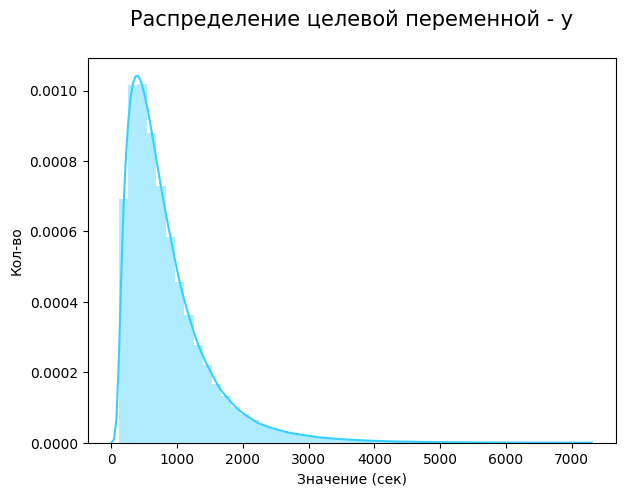

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train_df['trip_duration'].values, bins=50, color='#38d1ff')
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение (сек)'); plt.ylabel('Кол-во');

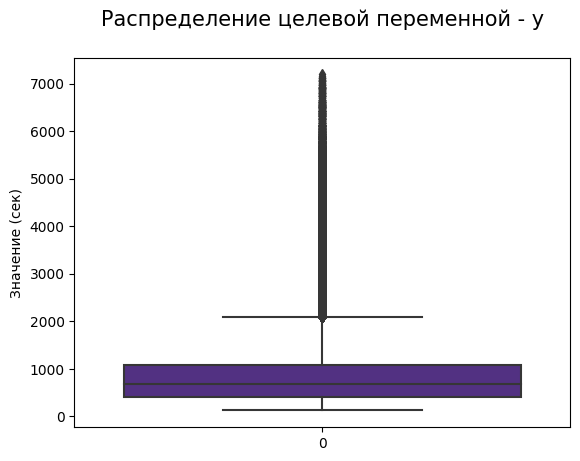

In [21]:
sns.boxplot(train_df['trip_duration'].values, color='#50248f')
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.ylabel('Значение (сек)'); 

Вывод: Да, остался длинный "хвост" выбросов, но пусть будет - посмотрим, как это повлияет на результат

In [22]:
train_df['trip_duration_log'] = np.log(train_df['trip_duration'] + 1)

Построим визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

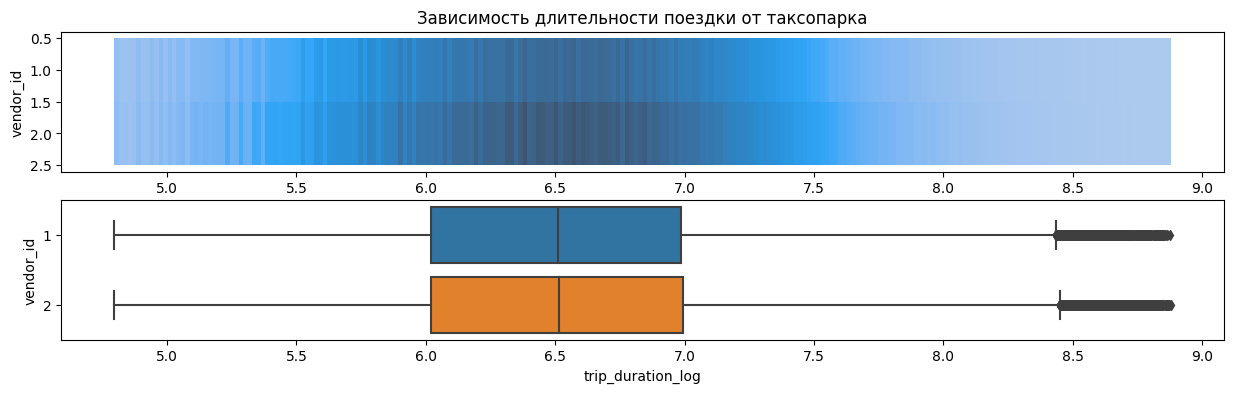

In [23]:
train_df['vendor_id'] = train_df['vendor_id'].astype('category')

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))
histplot = sns.histplot(
    data = train_df,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[0]
)

histplot.set_title('Зависимость длительности поездки от таксопарка')
boxplot = sns.boxplot(
    data = train_df,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[1]
);

Можно сделать вывод о том, что распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

Сравним распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag)

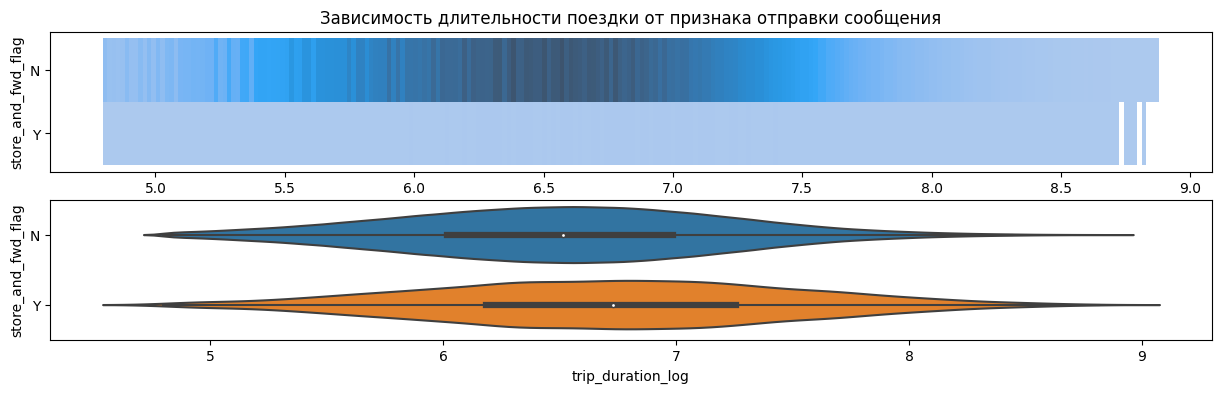

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))

histplot = sns.histplot(
    data = train_df,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[0]
)
histplot.set_title('Зависимость длительности поездки от признака отправки сообщения')
violinplot = sns.violinplot(
    data = train_df,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[1]
);


Распределения в группах значительно отличаются, прзнак store_and_fwd_flag имеет значение при определении длительности поездки

### Обогащение датасета признаками

Реализуем функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
- pickup_date - дата включения счетчика - начала поездки (без времени);  
- pickup_hour - час дня включения счетчика;
- pickup_day_of_week - наименование дня недели, в который был включен счетчик.

In [25]:
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = add_datetime_features(train_df)

Посмотрим на:
- распределение количества поездок в зависимости от часа дня;
- зависимость медианной длительности поездки от часа дня.

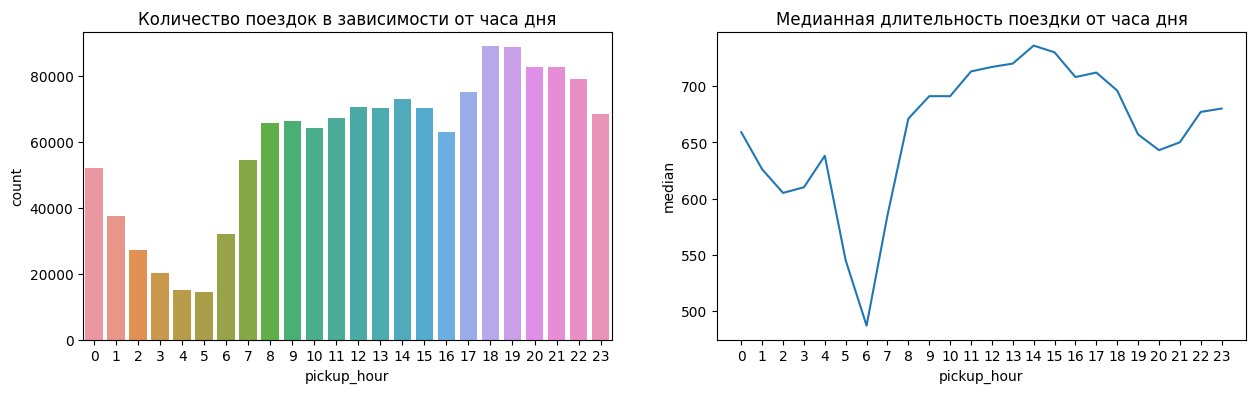

In [26]:
duration_by_hour = train_df.groupby('pickup_hour')['trip_duration'].median()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = train_df, x = 'pickup_hour', ax = axes[0])
countplot.set_title('Количество поездок в зависимости от часа дня')
lineplot = sns.lineplot(data = duration_by_hour, ax = axes[1])
lineplot.set_title('Медианная длительность поездки от часа дня')
lineplot.xaxis.set_ticks(duration_by_hour.index)
lineplot.set_ylabel('median');

Посмотрим на:
- распределение количества поездок в зависимости от дня недели;
- зависимость медианной длительности поездки от дня недели.

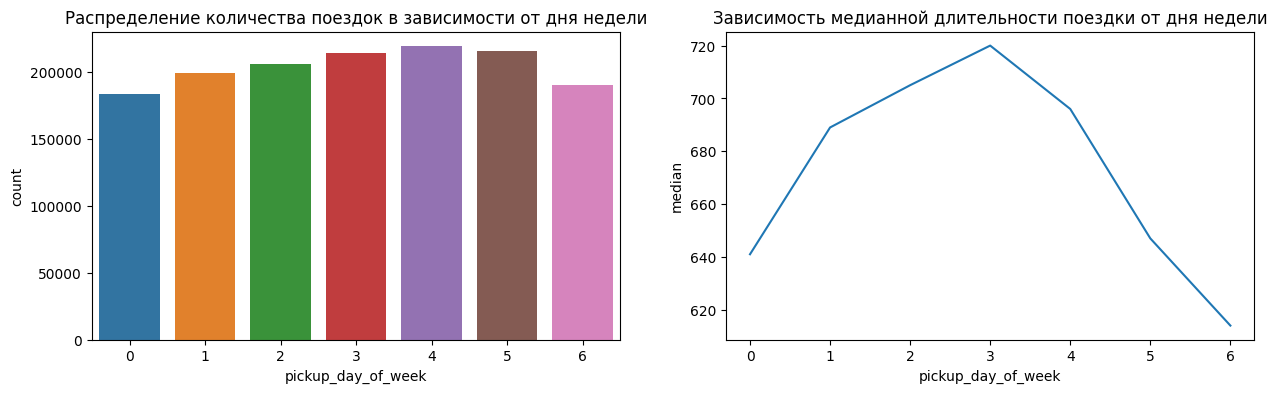

In [27]:
duration_by_day = train_df.groupby('pickup_day_of_week')['trip_duration'].median()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = train_df, x = 'pickup_day_of_week', ax = axes[0])
countplot.set_title('Распределение количества поездок в зависимости от дня недели')
lineplot = sns.lineplot(data = duration_by_day, ax = axes[1])
lineplot.set_title('Зависимость медианной длительности поездки от дня недели')
lineplot.set_ylabel('median');

Построим сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

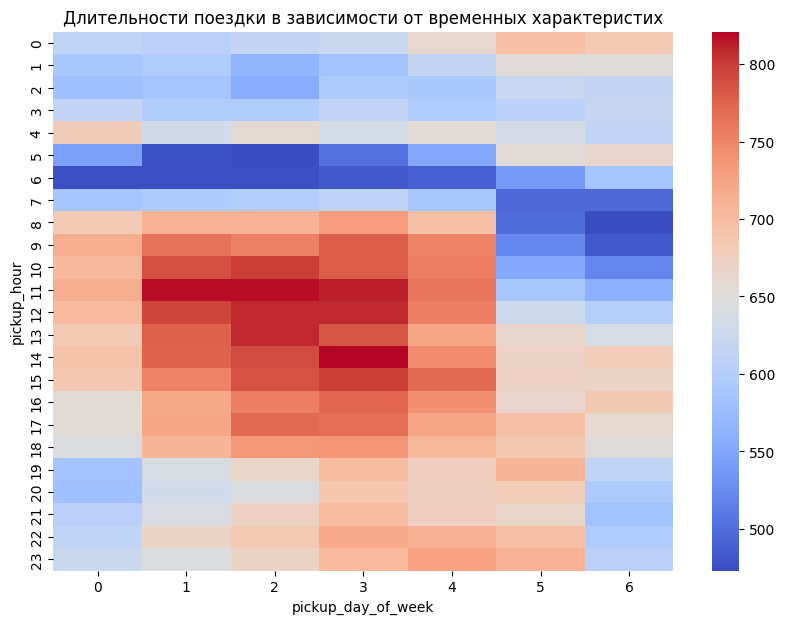

In [28]:
pivot = train_df.pivot_table(
    values = 'trip_duration',
    index = 'pickup_hour',
    columns = 'pickup_day_of_week',
    aggfunc = 'median'
)

# визуализируем полученную таблицу
fig = plt.figure(figsize = (10, 7))
heatmap = sns.heatmap(data = pivot, cmap = 'coolwarm')
heatmap.set_title('Длительности поездки в зависимости от временных характеристих');

In [29]:
# КРАСИВОЕ!

### Отбор и преобразование признаков

Для удобства работы сделаем копию исходной таблицы с поездками:

In [30]:
df = train_df.copy()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,13,5


Избавимся от очевидных неинформативных и избыточных признаках.

In [31]:
df = df.drop(['id', 'dropoff_datetime', 'pickup_datetime', 'pickup_date'], axis = 1)

Кодируем признаки vendor_id и store_and_fwd_flag 

In [32]:
df['vendor_id'] = df['vendor_id'].apply(
    lambda x: 0 if x == 1 else 1
).astype('int')

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(
    lambda x: 0 if x == 'N' else 1
).astype('int')

In [33]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,pickup_hour,pickup_day_of_week
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,6.122493,17,0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6.498282,0,6
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,7.661527,11,1
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6.063785,19,2
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,6.077642,13,5


Делаем one-hot-encoding и стандартизацию данных

In [34]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_log', 'pickup_hour',
       'pickup_day_of_week'],
      dtype='object')

In [35]:
df = pd.get_dummies(df, columns=['vendor_id', 'passenger_count'
                                 , 'store_and_fwd_flag', 'pickup_hour', 'pickup_day_of_week'])

In [36]:
col = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']
def get_scale(df,col, model):
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [37]:
df = get_scale(df, col, MinMaxScaler())

In [38]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_log,vendor_id_0,vendor_id_1,passenger_count_0,passenger_count_1,...,pickup_hour_21,pickup_hour_22,pickup_hour_23,pickup_day_of_week_0,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6
0,0.791302,0.365738,0.791591,0.731222,455,6.122493,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.791331,0.364062,0.791016,0.728287,663,6.498282,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.791354,0.365510,0.790920,0.726493,2124,7.661527,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.790842,0.363001,0.790805,0.726206,429,6.063785,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.791452,0.367181,0.791454,0.732663,435,6.077642,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df = df.drop(['trip_duration_log'], axis=1)
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,vendor_id_0,vendor_id_1,passenger_count_0,passenger_count_1,passenger_count_2,...,pickup_hour_21,pickup_hour_22,pickup_hour_23,pickup_day_of_week_0,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6
0,0.791302,0.365738,0.791591,0.731222,455,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.791331,0.364062,0.791016,0.728287,663,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.791354,0.365510,0.790920,0.726493,2124,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.790842,0.363001,0.790805,0.726206,429,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.791452,0.367181,0.791454,0.732663,435,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Разобьем данные на train и test

In [40]:
target_name = 'trip_duration'

In [41]:
X = df.drop(columns=target_name)
y = df[target_name]

In [42]:
X_train_, X_val, y_train_, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=13)

In [43]:
X_train_.shape, X_val.shape, y_train_.shape, y_val.shape 

((1071430, 47), (357144, 47), (1071430,), (357144,))

### Применение алгоритмов и их оценка 

### Рассмотрим Деревья решений

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
from sklearn import metrics

Сделаем ограничение на колличество значений в листе, пусть max_depth=3, затем проверим с помощью GridSearchCV

In [46]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [47]:
tree_reg.fit(X_train_, y_train_)

DecisionTreeRegressor(max_depth=3)

In [48]:
y_test_pred = tree_reg.predict(X_val)

In [49]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [50]:
print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_test_pred))
print('RMSE: %.1f' % mse(y_val,y_test_pred,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_test_pred))

Ошибка на тестовых данных
MSE: 264436.1
RMSE: 514.2
R2 : 0.3762


Применим GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [52]:
rfr = DecisionTreeRegressor(max_depth=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 3, return_train_score=True)

In [53]:
g_search.fit(X_train_, y_train_);

print(g_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...max_depth=1;, score=(train=0.190, test=0.191) total time=   1.1s
[CV 2/5] END ...max_depth=1;, score=(train=0.190, test=0.188) total time=   1.0s
[CV 3/5] END ...max_depth=1;, score=(train=0.191, test=0.187) total time=   1.0s
[CV 4/5] END ...max_depth=1;, score=(train=0.189, test=0.192) total time=   1.1s
[CV 5/5] END ...max_depth=1;, score=(train=0.190, test=0.191) total time=   1.0s
[CV 1/5] END ...max_depth=2;, score=(train=0.313, test=0.313) total time=   1.6s
[CV 2/5] END ...max_depth=2;, score=(train=0.314, test=0.310) total time=   1.6s
[CV 3/5] END ...max_depth=2;, score=(train=0.313, test=0.312) total time=   2.2s
[CV 4/5] END ...max_depth=2;, score=(train=0.313, test=0.312) total time=   1.7s
[CV 5/5] END ...max_depth=2;, score=(train=0.312, test=0.316) total time=   1.6s
[CV 1/5] END ...max_depth=3;, score=(train=0.379, test=0.376) total time=   2.2s
[CV 2/5] END ...max_depth=3;, score=(train=0.379

Лучшее качество при параметре 'max_depth': 10

#### Приведем обобщающую таблицу

In [54]:
data = pd.DataFrame(
    {
        'Algoritm': ['DecisionTree'],
        
        'MSE': [round(mse(y_val,y_test_pred),2)],
        
        'RMSE': [round(mse(y_val,y_test_pred,squared=False),1)],
        
        'R2': [round(r2_score(y_val,y_test_pred),4)]
    }

)

In [55]:
data

,Algoritm,MSE,RMSE,R2
0,DecisionTree,264436.1,514.2,0.3762


! Как-то так